## ASTR 21000, Winter 2020

## Homework Assignment 3 (60 points points)

### Yingyi Liang

In [164]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from codes.plot_utils import plot_pretty
plot_pretty(fontsize=12)

from scipy.optimize import minimize, differential_evolution
from codes.constants import clight
from codes.cosmology import d_L_vectorized

### Exercise 1: 1D and 2D histograms of data. (20 points)

**Task 1a. (5 points)** Acquire SDSS galaxy sample, as described in <a href="hw03_background_sdss.ipynb"><tt>hw03_background_sdss.ipynb</tt></a> notebook. Run the cells below and construct the histogram using the plotting routine, as shown. 

In [167]:
from astropy.io import fits
hdulist = fits.open('data/sdss_galaxies.fits') 
#data table in the FITS is a dictionary, which we will convert to the numpy dictionary (record)
data = np.asarray(hdulist[1].data)

In [168]:
#names of columns and their data types
print(data.dtype)

(numpy.record, [('objid', '>i8'), ('ra', '>f8'), ('dec', '>f8'), ('g', '>f4'), ('r', '>f4'), ('z', '>f4')])


Data in dictionaries can be accessed by the name of the corresponding variable. For example, we can subselect indices of data that satisfied a set of constraints as follows

In [169]:
zmin, zmax = 0.01, 0.14
rmin, rmax = 12, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))

In astronomy, the different of apparent magnitudes of an object measured in different filters is called "color," in analogy with how our eye converts brightness of light in different parts of the visible spectrum into perceived color. Here we will define $g-r$ color as the different of apparent magnitudes of galaxies in our sample in the $g$ and $r$ filters. 

In [170]:
# g-r color of all galaxies in the selected subsample
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]

In [171]:
print(np.size(gr))
print(gr.min(), gr.max())

71907
-10016.697 10.067097


In [172]:
print(data['objid'])

[1237648722833637574 1237648722833637551 1237648722833637550 ...
 1237661970107662560 1237661970107793504 1237661970107727960]


You can use the <tt>objid</tt> field for a specific galaxy to look at its image. Go to <a href="http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?#">this page</a> of the SDSS server and copy and paste integer of specific <tt>objid</tt> into ObjID field and click Go button for this field. You will be shown database infornation for the object corresponding to that ObjID including its image and spectrum. 

You can select some random objects correponding to different ranges of $g-r$ color and look at their images and spectra in the database to get a sense for how image or spectrum looks like for a given color. 

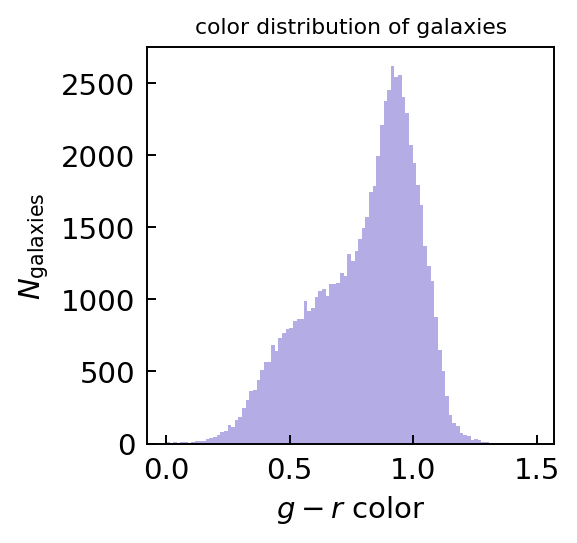

In [173]:
from codes.plot_utils import plot_histogram 
plot_pretty(fontsize=12)
plot_histogram(gr[(gr>0)&(gr<1.5)], bins='fd', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

#### Note that you can pass the number of bins as an integer to the routine via <tt>bins</tt> parameter. Plot histogram of $g-r$ colors of galaxies for different number of bins and note and briefly describe any changes in the appearance of the histogram. (2 points)
- Using around 20 bins can already show the general shape of the distribution, using more bins (40) makes the distribution smoother, using 100 bins shows a smoother shape but also some noise.

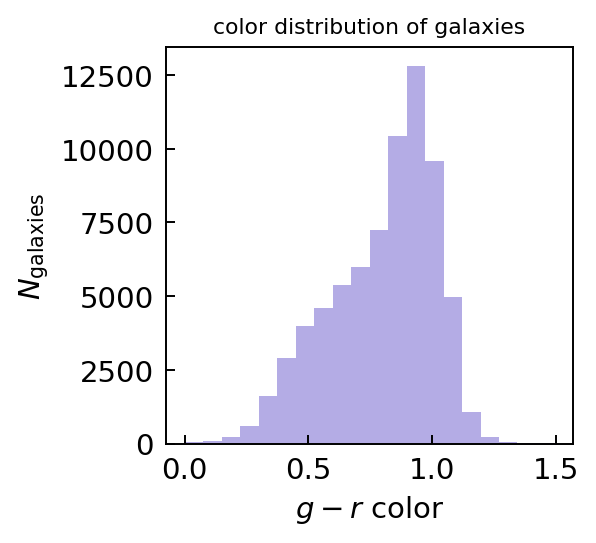

In [174]:
plot_histogram(gr[(gr>0)&(gr<1.5)], bins=20, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

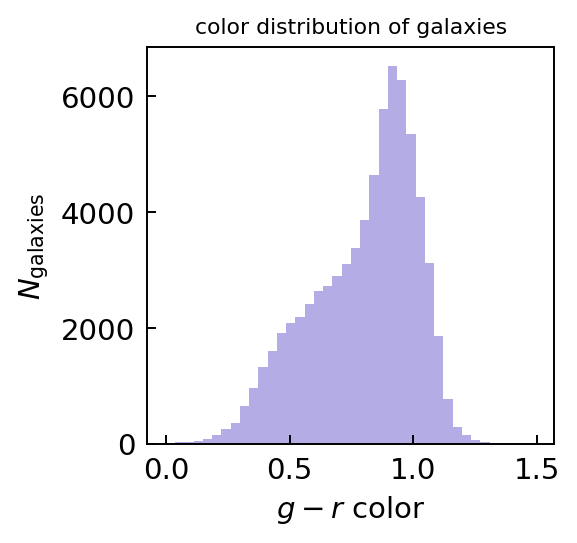

In [177]:
plot_histogram(gr[(gr>0)&(gr<1.5)], bins=40, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

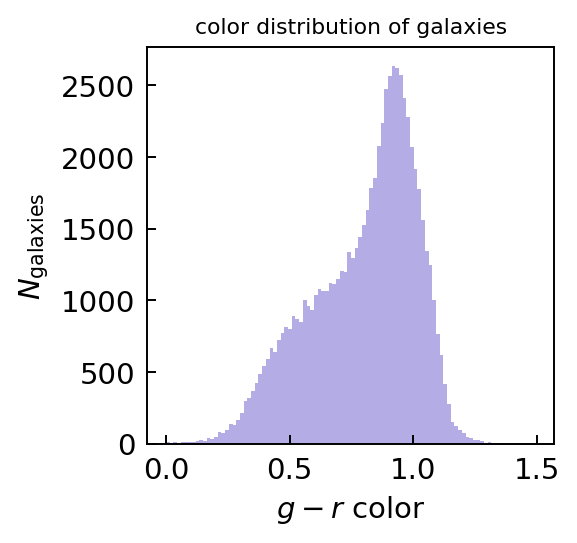

In [13]:
plot_histogram(gr[(gr>0)&(gr<1.5)], bins=100, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

#### You can also pass string options that are accepted by the <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html"><tt>numpy.histogram</tt></a> routine: <tt>'auto', 'sturges', 'fd', 'scott', 'rice', 'sqrt'.</tt> The meaning of these options and the heuristic models for bin number or bin width these correspond to is explained in the <a href="04_histograms.ipynb"><tt>04_histograms.ipynb</tt></a> notebook. Explore how the histogram changes when each of these options is used and briefly describe your results. (3 points)
- Since the 'Sturges' method assumes gaussian distribution and only gives good estimation for N < 200 and both of these are not met for our sample, it underestimated the number of bins needed. The 'rice' method which has a quicker increase of the number of bins generates a pretty good histogram, while the 'square root' methos that has a even quicker increase seem to give more bins than necessary, as the random noise are shown.
- Although the 'scott' method assumes Gaussian distribution, it gave a pretty nice result, similar to 'rice'. Comparing to these two, the 'auto' and 'fd' methods give a little more bins , and they start to show random noise (exp. at the tip around 1.0)

In [14]:
print("Sample size:", len(gr[(gr>0)&(gr<1.5)]))

Sample size: 71810


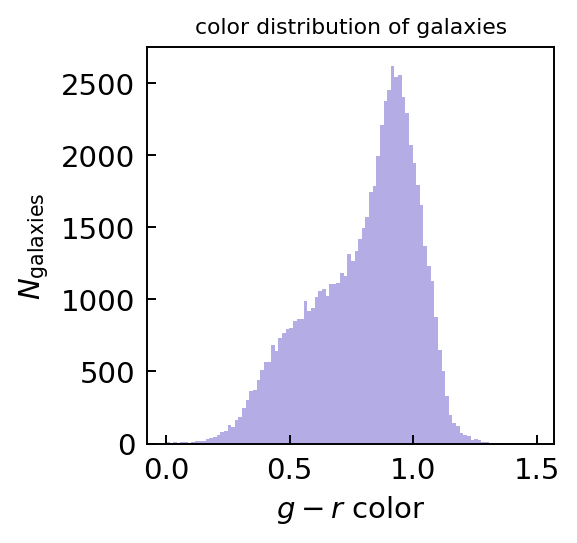

In [15]:
plot_histogram(gr[(gr>0)&(gr<1.5)], bins='auto', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

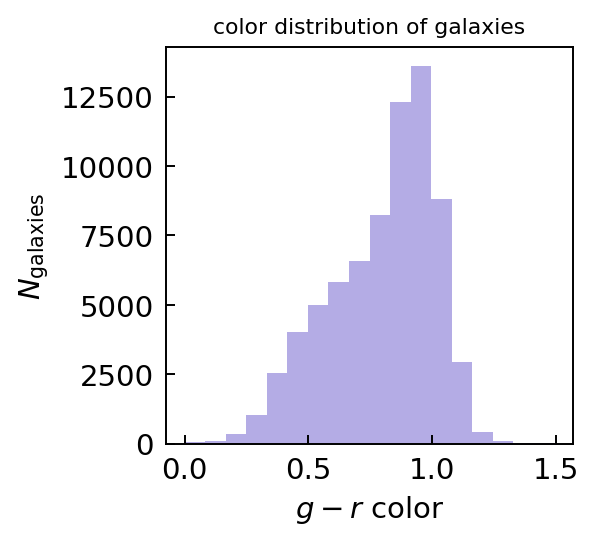

In [16]:
plot_histogram(gr[(gr>0)&(gr<1.5)], bins='sturges', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

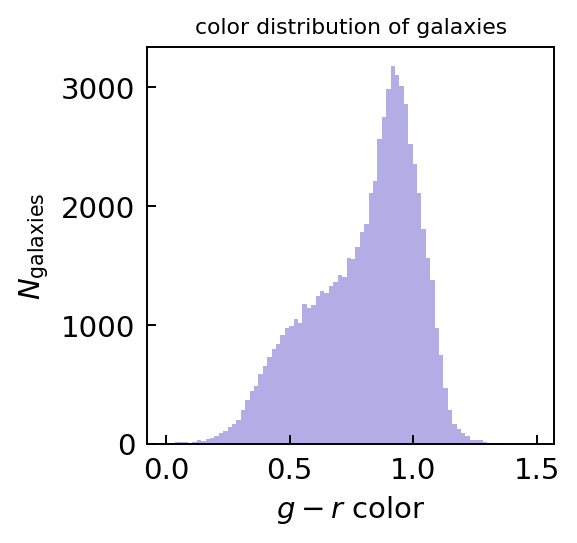

In [17]:
plot_histogram(gr[(gr>0)&(gr<1.5)], bins='rice', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

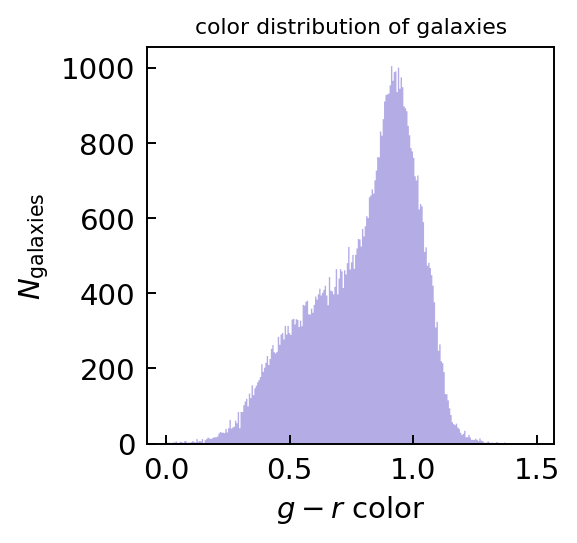

In [18]:
plot_histogram(gr[(gr>0)&(gr<1.5)], bins='sqrt', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

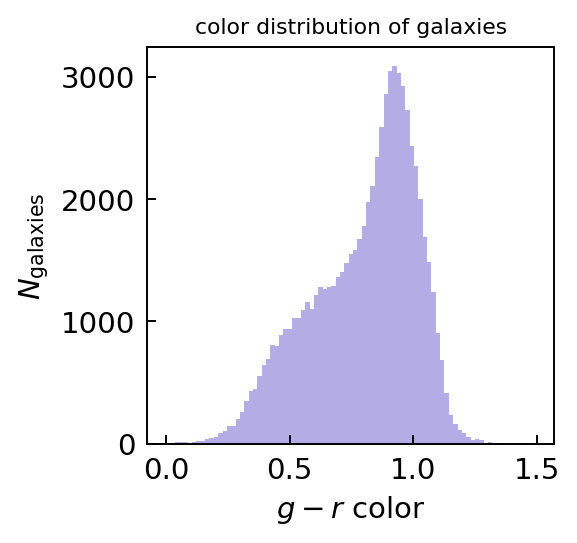

In [19]:
plot_histogram(gr[(gr>0)&(gr<1.5)], bins='scott', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

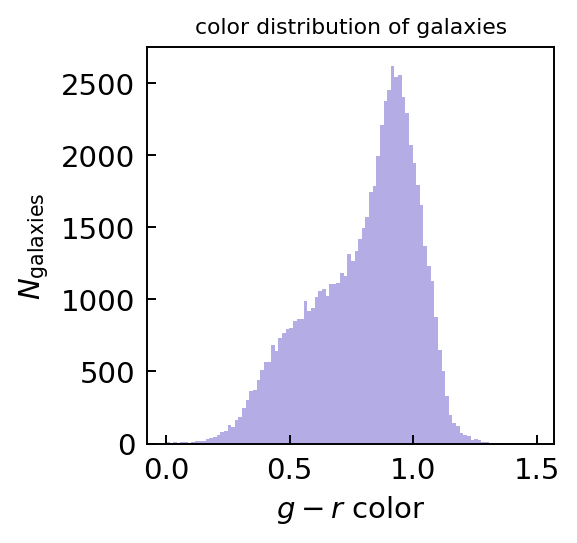

In [20]:
plot_histogram(gr[(gr>0)&(gr<1.5)], bins='fd', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

**Task 1b.** (5 points) Change the sample selection below by making redshift range (<tt>zmin, zmax</tt>) and/or range of $r$-band magnitude (<tt>rmin, rmax</tt>) narrower and centered on different values. Using <tt>bins='scott'</tt> for the binning, find a combination of ranges for which the distribution starts to look significantly different from that in 1a. 
- Looking at the galaxies with redshift between 0 and 0.6 (the group on the left of the *z* histogram), we can see two distinct peaks at around 0.5 and 0.8 on the *g-r* histogram.

Text(0.5,0,'r')

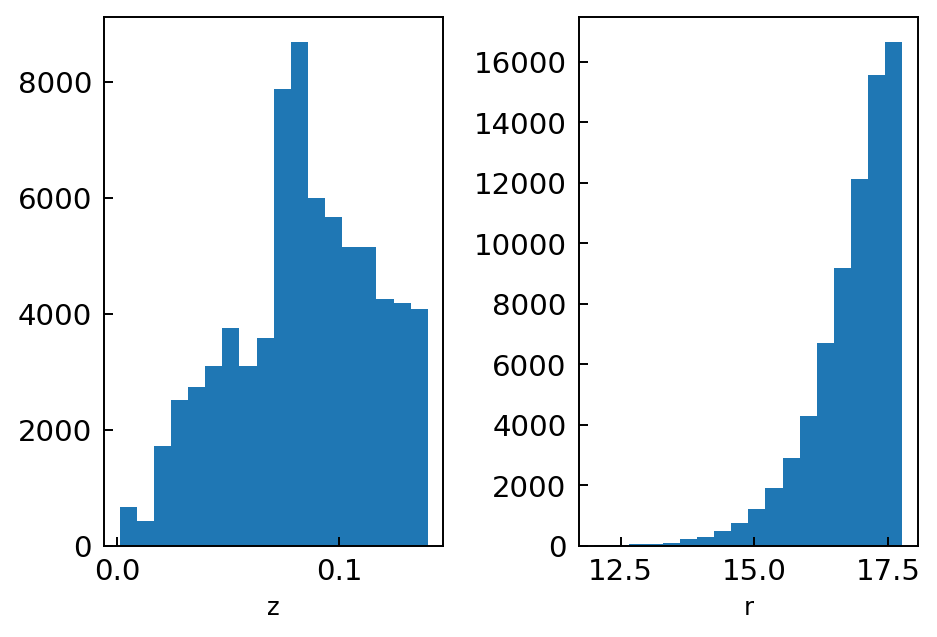

In [21]:
#look at distribution of z and r
plt.subplots_adjust(wspace = 0.4)
plt.subplot(121)
a = plt.hist(data['z'], bins = 'sturges')
plt.xlabel("z", fontsize=10)  
plt.subplot(122)
a = plt.hist(data['r'], bins = 'sturges')
plt.xlabel("r", fontsize=10)

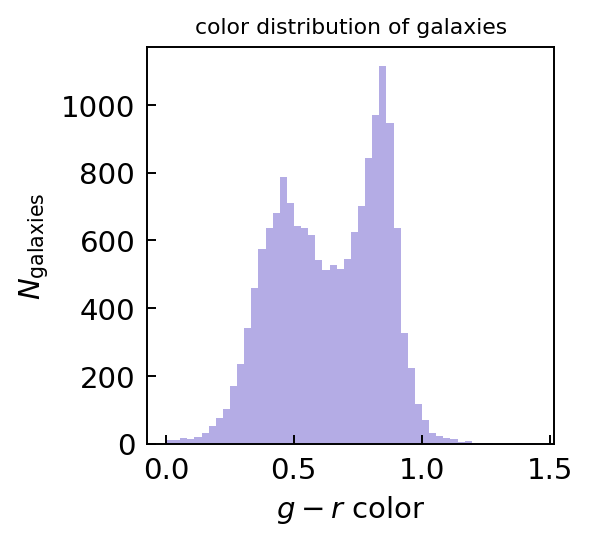

In [22]:
#Select group of galaxies by different z and/or r
zmin, zmax = 0.01, 0.06 #0.01, 0.14
rmin, rmax = 12, 17.77 #12, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]
plot_histogram(gr[(gr>0)&(gr<1.5)], bins='scott', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

#### In particular, for some choices it may reveal a new type of structure in the distribution with two distinct peaks. To identify where this happens, it may help to examine the distribution of colors in the $m_r-(g-r)$ plane. To do this, the code below uses routine, which in turn uses <a href="">numpy.histogram2d</a> and the Matplotlib's <tt>colormesh</tt> routine we used before to plot $d_L$ in the $\Omega_{\rm m0}-\Omega_\Lambda$ plot.  Look for ranges of $m_r$ in the distribution where more interesting structure is present. Briefly describe your exploration and results and show the final plot for which the distribution differs significantly and selection criteria that were used to subselect galaxies in that case.
- Graphing the 2D histogram of the group selected in the first part, we can see that it is very different from the orginal histogram, showing two clusters.

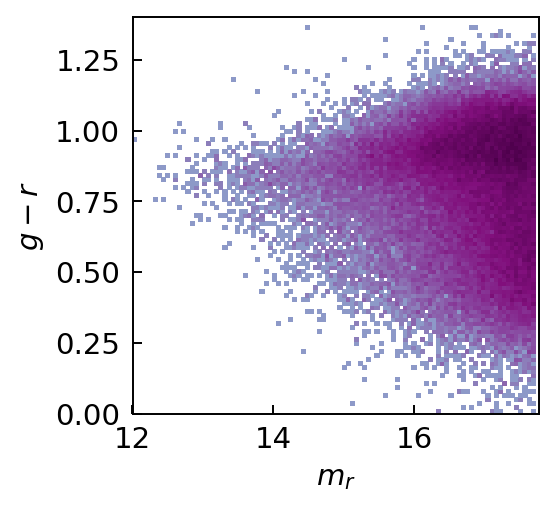

In [178]:
#original histogram
from codes.plot_utils import plot_2d_dist

plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=100, nybins=100, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

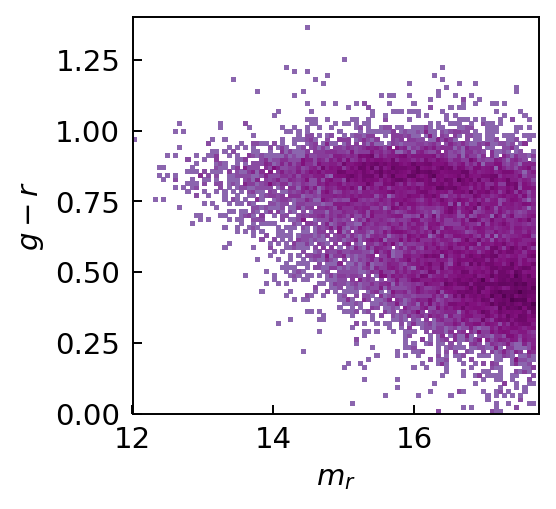

In [179]:
#selected galaxies with low z
zmin, zmax = 0.01, 0.06 #0.01, 0.14
rmin, rmax = 12, 17.77 #12, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]

plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=100, nybins=100, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

**Task 1c** (5 points). Given the lesson from binning metallicities of globular clusters in <a href="04_histograms.ipynb"><tt>04_histograms.ipynb</tt></a>, which showed that structure in the distribution may not real, check whether it is still present if the number of bins is estimated using the The Shimazaki-Shinomoto method and Knuth method. Examples of their use can be found in the <a href="04_histograms.ipynb"></a> and their usage for this case is shown in the cells below. Report your results and briefly describe your conclusions. 
- Using both Knuth and Shimazaki-Shinomoto methods, the double peaks are shown, so the structure is most likely real.

In [25]:
#orginal data
zmin, zmax = 0.01, 0.14
rmin, rmax = 12, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]

In [26]:
def shimazaki_shinomoto_rule(x, Nbmin=4, Nbmax=500):
    """
    Compute the number of bins for samples in a vector x using the 
    Shimazaki and Shinomoto (2007) method
    """
    x_max = np.max(x)
    x_min = np.min(x)
    Nbins = np.arange(Nbmin, Nbmax) # vector of bin numbers
    hb = (x_max - x_min) / Nbins    # bin size vector
    C = np.empty_like(hb)

    # computation of the cost function
    for i, Nb in enumerate(Nbins): 
        ni = np.histogram(x, bins=Nb)[0]
        nbar = np.mean(ni) # mean of counts in bins
        v = np.var(ni)  # biased variance estimate of counts in bins
        C[i] = (2. * nbar - v) / (hb[i]**2) # the cost function 

    # optimal bin size: find index of the smallest C
    imin = np.argmin(C)
    Nb_best, h_best  = Nbins[imin], hb[imin]
    return Nb_best, h_best 

nss, hss = shimazaki_shinomoto_rule(gr, Nbmin=4, Nbmax=500)

print("number of bins according to Shimazaki-Shinomoto method is %d"%nss)

number of bins according to Shimazaki-Shinomoto method is 499


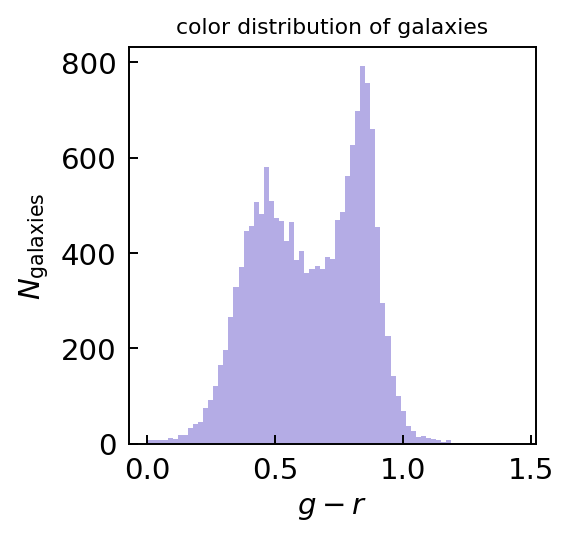

In [32]:
zmin, zmax = 0.01, 0.06 #0.01, 0.14
rmin, rmax = 12, 17.77 #12, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]
gr_ = gr[(gr>0)&(gr<1.5)]
nss, hss = shimazaki_shinomoto_rule(gr_, Nbmin=4, Nbmax=500)
plot_histogram(gr_, bins=nss, xlabel=r'$g-r$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

In [33]:
from codes.histtools import knuth_bin_width

h_knuth, bins_knuth = knuth_bin_width(gr_, return_bins=True)

n_knuth = np.shape(bins_knuth)[0] - 1
print("number of bins according to Knuth method is %d"%n_knuth)

Optimization terminated successfully.
         Current function value: -10000.482121
         Iterations: 16
         Function evaluations: 45
number of bins according to Knuth method is 53


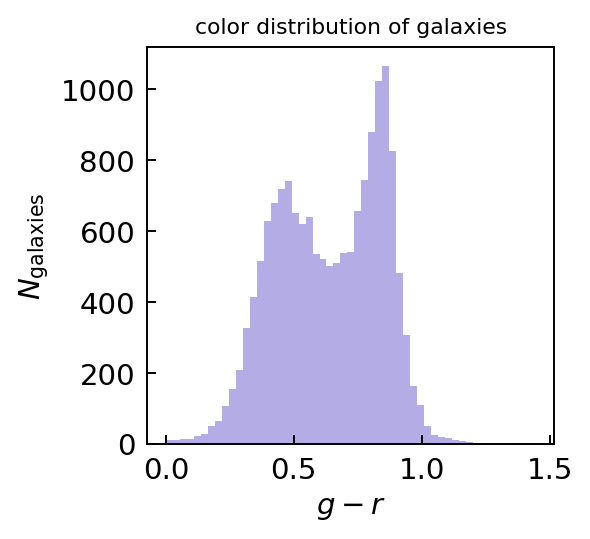

In [34]:
nss, hss = shimazaki_shinomoto_rule(gr_, Nbmin=4, Nbmax=500)
plot_histogram(gr_, bins=n_knuth, xlabel=r'$g-r$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

**Task 1d.** (5 points). Based on what you learned from material in <a href="04_histograms.ipynb"><tt>04_histograms.ipynb</tt></a> and in the exercises above, think about, develop, and describe a rough heuristic argument to guide the choice of number of bins in each dimension for a 2-dimensional histogram. Apply the rule you developed to the histogram of galaxies in the $m_r-(g-r)$ plane suggested in the Task 1b above and show the corresponding plot (3 points). 
- The method calculates bin number for both dimensions seperately, and returns the bigger number of those two if user wants equal output. In this case, "Shimazaki_Shinomoto" seems to give a better result, clearly showing two clusters, although this still might be an overestimation of bin size.

In [65]:
def get_n_bins_2d(data1, data2, method, equal = True):
    '''
    Calculate number of bins for a two-dimensional histogram
    Inputs:
        data1, data2(numpy.ndarray): data on x and y direction
        method(string): "Knuth" or "Shimazaki_Shinomoto"
    Outputs:
        a tuple containing the number of bins in each dimension
    '''
    assert method == "Knuth" or "Shimazaki_Shinomoto", \
    'Please input "Knuth" or "Shimazaki_Shinomoto" as the method.'
    if method == "Knuth":
        h_knuth, bins_knuth = knuth_bin_width(data1, return_bins=True)
        n1 = np.shape(bins_knuth)[0] - 1
        h_knuth, bins_knuth = knuth_bin_width(data2, return_bins=True)
        n2 = np.shape(bins_knuth)[0] - 1
    elif method == "Shimazaki_Shinomoto":
        n1, hss = shimazaki_shinomoto_rule(data1, Nbmin=4, Nbmax=500)
        n2, hss = shimazaki_shinomoto_rule(data2, Nbmin=4, Nbmax=500)
    if equal:
        n = max(n1, n2)
        return (n, n)
    return (n1, n2)

Optimization terminated successfully.
         Current function value: -7334.721023
         Iterations: 17
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -136047.868159
         Iterations: 38
         Function evaluations: 93


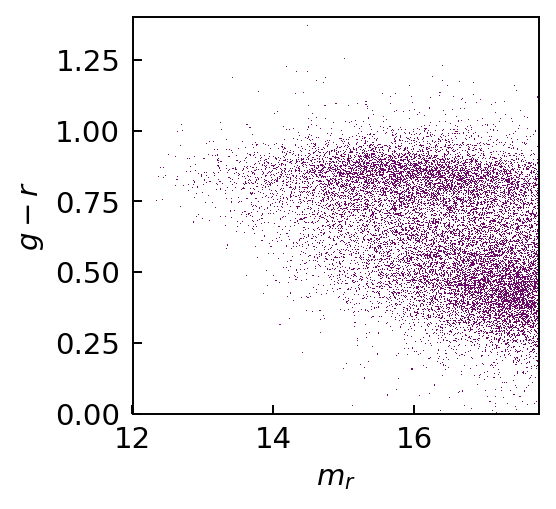

In [66]:
n1, n2 = get_n_bins_2d(mr, gr, "Knuth")
plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=n1, nybins=n2, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

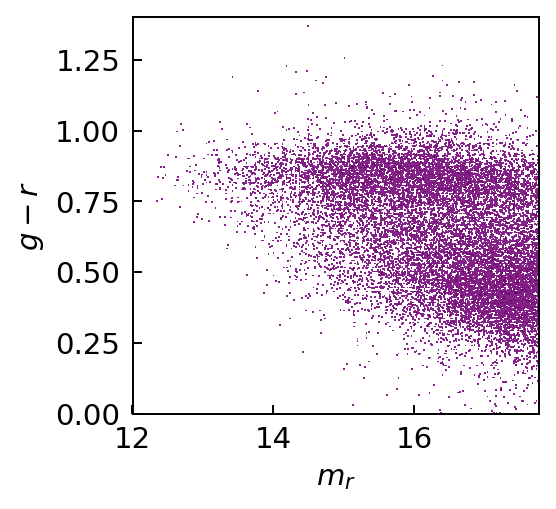

In [67]:
n1, n2 = get_n_bins_2d(mr, gr, "Shimazaki_Shinomoto")
plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=n1, nybins=n2, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

Finally, using the galaxy coordinates <tt>xgal</tt> and <tt>ygal</tt> computed as shown below, plot distribution of galaxies as 2d histogram using routine <tt>plot_2d_dist</tt>, instead of plotting each galaxy as a point, as in the code below. Discuss whether the rule you developed for the number of bins for choosing the number of bins produce reasonable results in this case as well? (2 points). 
- Bin numbers calculated from both methods showed the general struture. I think "Shimazaki_Shinomoto" worked better in this case because the figure showed more spatial information without being showing too much random scatter.

In [53]:
H0 = 70. 
d_C = clight * data['z'] / H0 # approximate calculation of comoving distance using Hubble law

# conversion of sky coordinates in x-y coordinates. all galaxies are assumed to have the same dec
# for visualization purposes
ygal = d_C * np.cos(data['ra'] * np.pi / 180.)
xgal = d_C * np.sin(data['ra'] * np.pi / 180.)


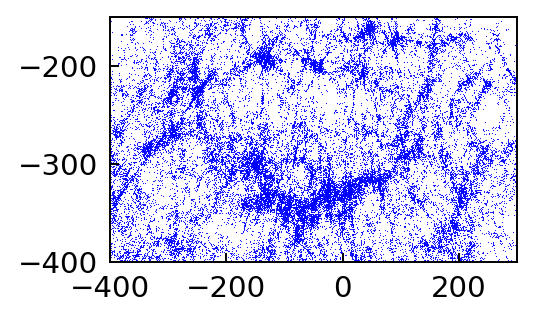

In [54]:
figx = 3.
xmin, xmax = -400.,  300.
ymin, ymax = -400., -150.


fxy = np.abs(ygal.max()-ygal.min()) / np.abs(xgal.max() - xgal.min())
figy = figx  * fxy

plot_pretty(fontsize=12)
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(figx,figy))
plt.xlim([xmin, xmax]); plt.ylim([ymin, ymax])

ax.scatter(xgal, ygal, s=0.2, lw=0, c='b')

plt.show()

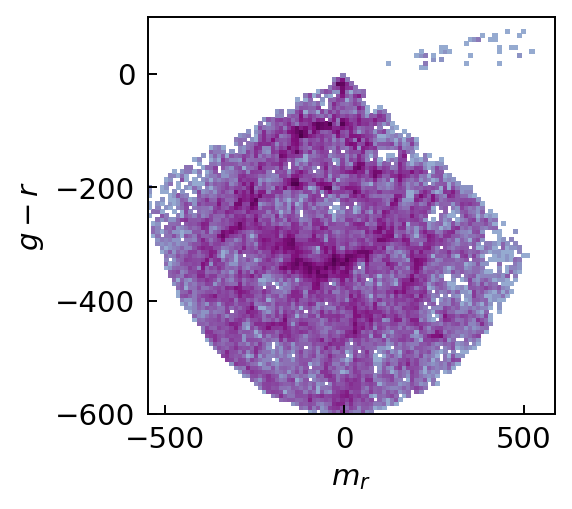

In [55]:
plot_2d_dist(xgal, ygal, xlim=[xgal.min(), xgal.max()], ylim=[ygal.min(), ygal.max()],
             nxbins=100, nybins=100, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

Optimization terminated successfully.
         Current function value: -28573.279613
         Iterations: 18
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -23832.951583
         Iterations: 17
         Function evaluations: 48


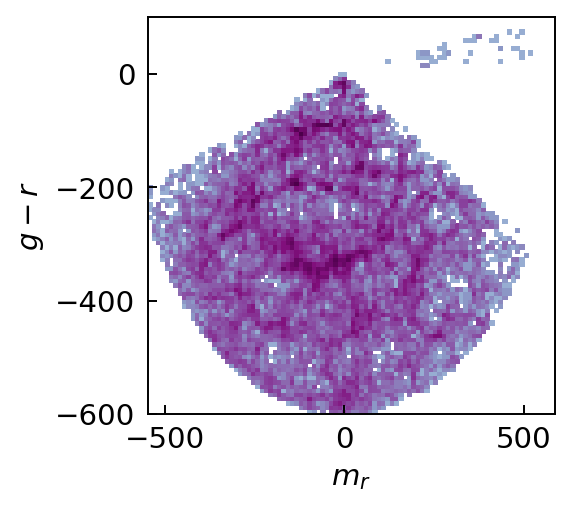

In [68]:
n1, n2 = get_n_bins_2d(xgal, ygal, "Knuth")
plot_2d_dist(xgal, ygal, xlim=[xgal.min(), xgal.max()], ylim=[ygal.min(), ygal.max()],
             nxbins=n1, nybins=n2, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

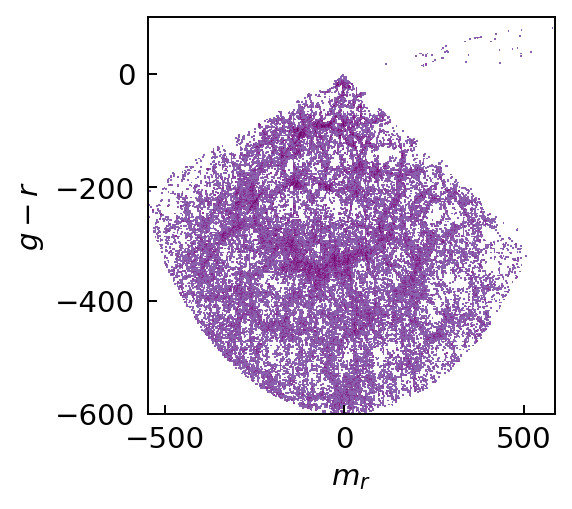

In [69]:
n1, n2 = get_n_bins_2d(mr, gr, "Shimazaki_Shinomoto")
plot_2d_dist(xgal, ygal, xlim=[xgal.min(), xgal.max()], ylim=[ygal.min(), ygal.max()],
             nxbins=n1, nybins=n2, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

### Exercise 2: using $\tilde{d}_L$ approximation and supernova type Ia sample to measure the average density of matter and vacuum energy in our Universe (40 points)

In this exercise you will be putting the approximation for the luminosity distance $\tilde{d}_L$ that you developed in the exercise 2 of homework 2 to use to obtain information about parameters of $\Omega_{\rm m0}$ and $\Omega_\Lambda$ that are consistent with existing observations of type Ia supernovae. First a recap of the model. 

### Observational sample of supernovae type Ia

We will use a combined sample of 740 supernovae type Ia assembled and published in a study of 
<a href="https://ui.adsabs.harvard.edu/abs/2014A%26A...568A..22B/abstract">Betoule et al. (2014)</a>. The file containing the sample is available in the course repository and was downloaded from <a href="http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html">here</a>.

In [2]:
from codes.read_data import read_jla_data

# you may need to change slash in the file name below on your system
# read vectors of redshifts, apparent magnitude in B-band, mB, and its uncertainty emB:
zCMB, mB, emB = read_jla_data(sn_list_name = 'data/jla_lcparams.txt')

print("Read sample of %d supernovae..."%(np.size(zCMB)))

Read sample of 740 supernovae...


**Task 2a. (20 points)** In homework 2, you constructed approximation for $\tilde{d}_L(z,\Omega_{\rm m0},\Omega_\Lambda)$ as a function of $\Omega_{\rm m0}$ and $\Omega_\Lambda$ for a fixed $z$ using a 2D grid of <tt>ntrx x ntry</tt> training points, where <tt>ntr, ntry</tt> are the smallest number of training points guaranteeing the target accuracy. For this  exercise, you need to construct such 2D approximation tables for $740$ redshifts of the supernovae in the sample. 

Thus, using the best choices you've identified in hw 2, arrange for a loop that goes over supernova redshifts and for each redshift $z_i$ constructs spline or polynomial (whichever you concluded was best) approximation for $\tilde{d}_L(z_i,\Omega_{\rm m0},\Omega_\Lambda)$ on an <tt>ntrx x ntry</tt> grid of the training points. <tt>ntrx, ntry</tt> and the size of the grid and training points should be the same for all redshifts. 

Put your approximations in a 3D array, the first dimension of which has size equal to the number of supernovae, while the other two dimensions have sizes of <tt>ntrx, ntry</tt> (**10 points**). The code below shows an outline of one possible way of how this can be done, but feel free to do it in a different way that may be more natural to you. You can arrange 
construction of this approximation in the hw 2 notebook, which may be more convenient and then transfer resulting array to this notebook using the pickle module, as described at the end of this notebook. 

If you will not be able to construct this approximation, please contact instructor for guidance. Depending on the degree of the issue, approximation may be provided to you to proceed with the rest of this exercise. 

- Our best result was 13 degree polyfit with chev2 and 20 training points.

In [14]:
#import functions from previous assignments
def polyfit2d(xtr, ytr, ftr, kx = 3, ky = 3, order = None):
    '''
    Two dimensional polynomial fitting by least squares.
    Fits the functional form f(x,y) = z.

    Notes
    -----
    Resulting fit can be plotted with:
    np.polynomial.polynomial.polygrid2d(x, y, soln.reshape((kx+1, ky+1)))

    Parameters:
    ----------
    xtr, ytr: array-like, 1d
        xtr and ytr coordinates.
    ftr: 2d numpy array
        f(xgtr, ygtr) values evaluated on meshgrid of xtr and ytr vectors to fit by polynomial
    kx, ky: int, default is 3
        Polynomial order in x and y, respectively.
    order: int or None, default is None
        If None, all coefficients up to maxiumum kx, ky, ie. up to and including x^kx*y^ky, are considered.
        If int, coefficients up to a maximum of kx+ky <= order are considered.

    Returns:
    -------
    Return paramters from np.linalg.lstsq.

    soln: np.ndarray
        Array of polynomial coefficients.
    residuals: np.ndarray
    rank: int
    s: np.ndarray

    '''

    # grid coords
    x, y = np.meshgrid(xtr, ytr)
    # coefficient array, up to x^kx, y^ky
    coeffs = np.ones((kx+1, ky+1))

    # solve array
    V = np.zeros((coeffs.size, x.size))

    # construct Vandermonde matrix: for each coefficient produce array x^i, y^j
    for index, (j, i) in enumerate(np.ndindex(coeffs.shape)):
        # do not include powers greater than order
        if order is not None and i + j > order:
            arr = np.zeros_like(x)
        else:
            arr = coeffs[i, j] * x**i * y**j
        V[index] = arr.flatten()
        
    # do leastsq fitting and return leastsq result
    return np.linalg.lstsq(V.T, np.ravel(ftr), rcond=None)[0]

def chebyshev_nodes2(a, b, N):
    return a + 0.5*(b-a)*(1. + np.cos(np.arange(N+1)*np.pi/N))

def cal_dL_2d(Om0_array, OmL_array, z, H0): 
    '''
    Calculates matrix of precise d_L result by given Om0 and OmL lists
    '''
    f = []
    for OmL in OmL_array:
        l1 = []
        for Om0 in Om0_array:
            l1.append(d_L_vectorized(z, H0, Om0, OmL))
        f.append(l1)
    return f

In [16]:
deg = 13
def get_poly_matrix_3d(zCMB, ntrx, ntry):
    lmin, lmax, ntr = 0.0, 1.0, 20
    Om0tr = chebyshev_nodes2(lmin, lmax, ntrx + 1)[::-1]
    OmLtr = chebyshev_nodes2(lmin, lmax, ntry + 1)[::-1]
    dLz = []
    for z in zCMB:
        ftr = cal_dL_2d(Om0tr, OmLtr, z, H0)
        dLz.append(polyfit2d(Om0tr, OmLtr, ftr, kx=deg, ky=deg, order=None))
    return np.asarray(dLz)

In [17]:
dLz = get_poly_matrix_3d(zCMB, 10, 10)

In [73]:
print("Number of data points:", len(zCMB))
print("ntrx:", ntrx)
print("ntry:", ntry)
print("Dimensions of generated array:", dLz.shape)

Number of data points: 740
ntrx: 10
ntry: 10
Dimensions of generated array: (740, 10, 10)


In [116]:
#check polyfit
i = 20
Omega0, OmegaL = 0.578, 0.578
print(np.polynomial.polynomial.polyval2d(Omega0, OmegaL, dLz[i].reshape((13+1,13+1))))
print(d_L_vectorized(zCMB[i], H0, Omega0, OmegaL))

3864.6342156978044
3864.634214368583


Write a routine that has input parameters $\Omega_{\rm m0}$, $\Omega_\Lambda$, $\tilde{M}_0$ values and computes $\chi^2$ using the list of approximations prepared via the procedure outlined above. (**10 points**)

In [117]:
H0 = 70.

def calc_reduced_chi2(params): 
    Omega0, OmegaL, M0 = params
    '''
    Compute chi^2 using provided equation by summing overall all SNe using 
    approximations for tilde{d}_L described above
    '''
    chi2 = 0
    tM0 = M0 + 5*np.log10(clight/H0) + 25
    for i in range(len(zCMB)):
        d_L = np.polynomial.polynomial.polyval2d(Omega0, OmegaL, dLz[i].reshape((deg + 1, deg + 1)))
        del_mu = mB[i] - 5*np.log10(d_L) - tM0
        chi2 += (del_mu**2)/(emB[i]**2)
    return chi2/(len(zCMB) - 3)

**Task 2b (5 points).**  Define three vectors of uniformly spaced values for parameters $\Omega_{\rm m0}$, $\Omega_\Lambda$, $\tilde{M}_0$ of some specified size, which should be considerably larger than the size of the training sample used to construct approximation (say 100). Note that the range of values for  $\Omega_{\rm m0}$ and $\Omega_\Lambda$ should be the same as the range for which you constructed $\tilde{d}_L$ approximation to avoid extrapolation. $M_0$ for SN type Ia is close to $-19.1$, so you can set $H_0=70.$ and define a range for $\tilde{M}_0$ by varying $M_0$ from say $-18.6$ to $-19.6$. 

Define a 3D array for $\chi^2$ values with dimensions corresponding to these three parameter vectors. 
Arrange a triple loop over the values in these vectors to fill the $\chi^2$ array using the routine you implemented in Task 2a. Find the grid point that corresponds to the minimum value of $\chi^2$ and print out its indices, the corresponding $\Omega_{\rm m0}$, $\Omega_\Lambda$, $\tilde{M}_0$, and $\chi^2$ values. This can be done either during the triple loop or after it is completed using the <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html"><tt>np.argmin</tt></a> routine. 

The minimum you find should be within the range of parameter vectors that you defined, not at the edge of the ranges.

- The M0 value is optimized at around -37.172, giving a tM0 of 5.987.

In [130]:
lmin, lmax, ntr = 0.0, 1.0, 100 #100
Om0op = np.linspace(lmin, lmax, ntr)
OmLop = np.linspace(lmin, lmax, ntr)
M0 = np.linspace(-40, -30, ntr)

In [131]:
def find_least_chi2_pars(Omega0, OmegaL, M0):
    '''
    '''
    chi2 = calc_reduced_chi2((Omega0[0], OmegaL[0], M0[0]))
    
    for i, Om0_ in enumerate(Omega0):
        for j, OmL_ in enumerate(OmegaL):
            for k, M0_ in enumerate(tM0):
                chi2_ = calc_reduced_chi2((Om0_, OmL_, M0_))
                #print(i,j,k)
                if chi2_ < chi2:
                    chi2 = chi2_
                    pos = (i, j, k)
    print("chi^2 is", chi2)
    return (Omega0[pos[0]], OmegaL[pos[1]], M0[pos[2]])

In [132]:
find_least_chi2_pars(Om0op, OmLop, tM0)

chi^2 is 6.224068623972032


(0.020202020202020204, 0.25252525252525254, -37.17171717171717)

**Task 2c (5 points).** Use examples in the <a href="05_optimization.ipynb"><tt>05_optimization.ipynb</tt></a> notebook for the use of <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize"><tt>scipy.optimize.minimize</tt></a> routine and use <tt>Nelder-Mead</tt> or <tt>SLSQP</tt> methods or <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution"><tt>scipy.optimize.differential_evolution</tt></a> routine to find the minimum of $\chi^2_\nu$ using your <tt>chi2</tt> function. Compare to the minimum you obtained in the Task 2b and make sure they agree (that is the values obtained using these two methods are close). 



Based on this information and the $\chi^2_\nu$ value you estimated, report what you conclude about how well the 3-parameter model describes the data.
- $\chi^2_\nu\approx$ 6.2124/3 = 2.071 in both cases (also similar result in the brute force approach), which means the model gives pretty good description of data. Seems like the value of $\Omega_0$ and $\Omega_\Lambda$ doesn't have as big influence on the data as tM0, because the brute force result gave very different $\Omega_0$ and $\Omega_\Lambda$ (part of the reason might be the limited test grid resolution) but similar tM0. 

In [113]:
aminimize(calc_reduced_chi2, [0.3, 0.3, -19.1], method = 'Nelder-Mead')

 final_simplex: (array([[  0.322135  ,   0.37476049, -37.20888027],
       [  0.32222584,   0.37480583, -37.20888519],
       [  0.32206234,   0.37474664, -37.208868  ],
       [  0.32208554,   0.37474473, -37.20886813]]), array([6.21247125, 6.21247125, 6.21247126, 6.21247126]))
           fun: 6.212471254115416
       message: 'Optimization terminated successfully.'
          nfev: 270
           nit: 149
        status: 0
       success: True
             x: array([  0.322135  ,   0.37476049, -37.20888027])

In [133]:
differential_evolution(calc_reduced_chi2, [(0,1), (0, 1), (-45, -30)])

     fun: 6.212471253898084
     jac: array([ 4.08562073e-06, -2.22044605e-06,  4.85833596e-05])
 message: 'Optimization terminated successfully.'
    nfev: 604
     nit: 11
 success: True
       x: array([  0.32217672,   0.37478304, -37.20888288])

**Task 2d. (10 points)** Extract a 2D slice of your 3D grid that corresponds to the value of $\tilde{M}_0$ for which the minimum of $\chi^2_\nu$ was identified. In other words,the slice should contain the values of $\chi^2$ as a function of $\Omega_{\rm m0}$ and $\Omega_\Lambda$ for the value of $\tilde{M}_0$ for which $\chi^2_\nu$ has minimum value.  

Describe your results and conclusions that you can draw from your plot. What are the constraints that supernovae measurement give us for the $\Omega_{\rm m0}$ and $\Omega_\Lambda$ parameters?
- From my plots, the $\Omega_{\rm m0}$ should be between 0 and 0.6 whereas the $\Omega_\Lambda$ is basically between 0 and 1, not a very strict restriction...

In [144]:
lmin, lmax, ntr = 0.0, 1.0, 100
Om0op = np.linspace(lmin, lmax, ntr)
OmLop = np.linspace(lmin, lmax, ntr)
result_2d = []
for Om0 in Om0op:
    l = []
    for OmL in OmLop:
        l.append(calc_reduced_chi2([Om0, OmL, -37.20888027]))
    result_2d.append(l)

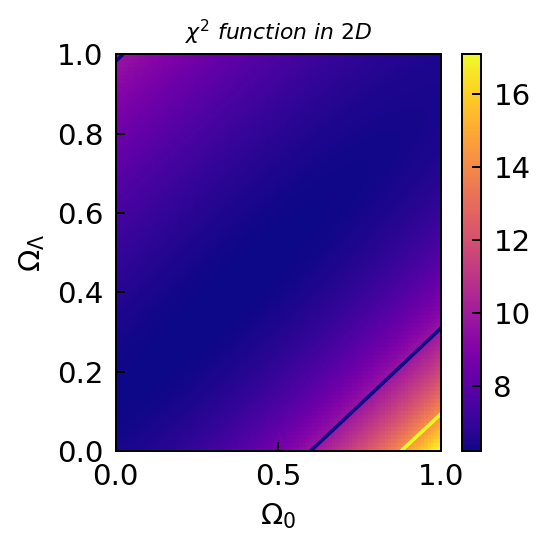

In [191]:
from codes.plot_utils import plot_color_map
chi2min = 6.212471253898084

levs = [chi2min + 3.53, chi2min + 8.03]

plot_color_map(Om0op, OmLop, np.array(result_2d).T, xlim=[0, 1], ylim=[0, 1], 
                   xlabel = r'$\Omega_0$', ylabel = '$\Omega_{\Lambda}$', cmap='plasma', colorbar=True, 
                   plot_title=r'$\chi^2\ function\ in\ 2D$', contours=True, 
                   contcmap='plasma', levels = levs, 
                   figsize=3.0)